<a href="https://colab.research.google.com/github/Wolfman1219/Signallar_ustida/blob/main/Signallar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
from matplotlib import mlab
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
fs = 10e3
N = 1e5
NFFT = 1024
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

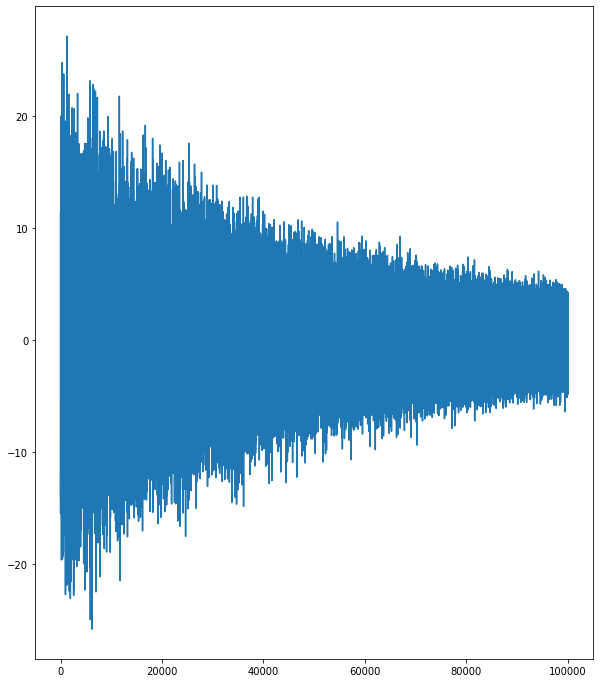

In [ ]:
plt.figure(figsize=(10,12))
plt.plot(x)
plt.show()

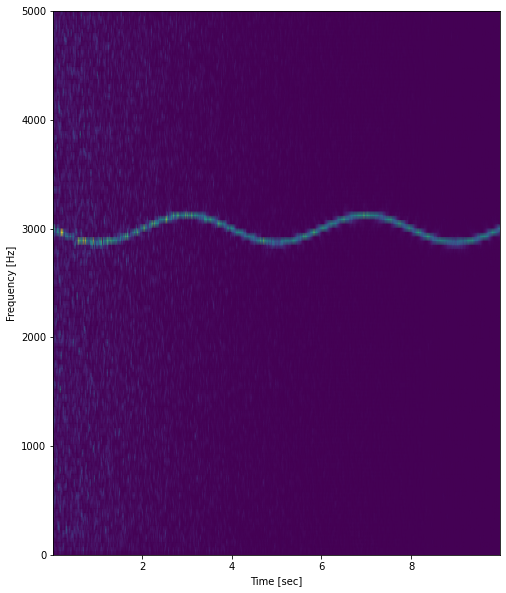

In [ ]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.figure(figsize=(8,10))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

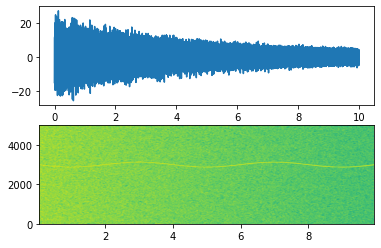

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(time, x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT,Fs=fs, noverlap=900)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=100).
  """


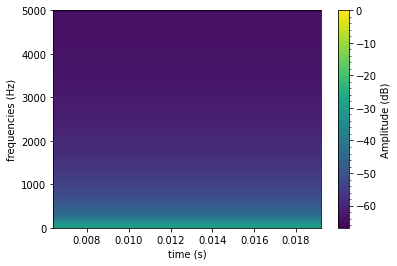

In [ ]:
def specgram2d(y, srate=44100, ax=None, title=None):
  if not ax:
    ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True)
  spec, freqs, t, im = ax.specgram(y, Fs=fs, scale='dB', vmax=0)
  ax.set_xlabel('time (s)')
  ax.set_ylabel('frequencies (Hz)')
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label('Amplitude (dB)')
  cbar.minorticks_on()
  return spec, freqs, t, im
fig1, ax1 = plt.subplots()
specgram2d(x, srate=fs, ax=ax1)
plt.show()

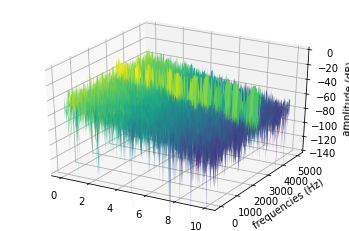

In [ ]:
def specgram3d(y, srate=44100, ax=None, title=None):
 if not ax:
    ax = plt.axes(projection='3d')
 ax.set_title(title, loc='center', wrap=True)
 spec, freqs, t = mlab.specgram(y, Fs=srate)
 X, Y, Z = t[None, :], freqs[:, None],  20.0 * np.log10(spec)
 ax.plot_surface(X, Y, Z, cmap='viridis')
 ax.set_ylabel('frequencies (Hz)')
 ax.set_ylabel('frequencies (Hz)')
 ax.set_zlabel('amplitude (dB)')
 ax.set_zlim(-140, 0)
 return X, Y, Z
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
specgram3d(x, srate=fs, ax=None)
plt.show()

Text(0.5, 0, 'Z')

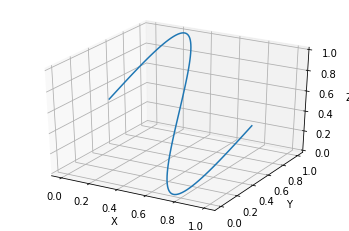

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
z = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, z, zdir='z', label='curve in (x, y)')
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')